In [2]:
# !pip install top2vec
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec

     |████████████████████████████████| 80 kB 7.1 MB/s eta 0:00:011
     |████████████████████████████████| 6.4 MB 11.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 12.1 MB/s eta 0:00:01
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp38-cp38-macosx_10_9_x86_64.whl size=716673 sha256=74461e649f01841f6e5b7e799f785b6be2be22fd9dde6f85b108d5100dbd9efc
  Stored in directory: /Users/huiwen/Library/Caches/pip/wheels/26/f2/c2/eab587fff76dc9ffc9a9bf3ca0e44e26d2ef6425264492df65
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=41cd4fdcc06c76bfc56a2ec351aa94ab0a78d92b91277d52c4864b03f9ea7c56
  Stored in directory: /Users/huiwen/Library/Caches/pip/wheels/95/85/b7/b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52359 sha256

In [3]:
df = pd.read_csv("/Users/huiwen/Documents/Side Projects/Omdena/omdena-colombia-socialnetwork/Untitled/src/data/task-2-preprocessing/merged_data/Final/Corrected_Final_all.csv", usecols = ["preprocessed_data_without_hashtags"])
df.head()

preprocessed_data_without_hashtags
0             ['hacer', 'mayo', 'cazar', 'fantasma']
1  ['despues', 'esperar', 'ancia', 'ahora', 'espe...
2  ['esperar', 'llegar', 'oido', 'nuevo', 'inicia...
3  ['menos', 'mes', 'urkullu', 'temer', 'perder',...
4  ['edicion', 'festival', 'internacional', 'puen...

In [4]:
doc = df['preprocessed_data_without_hashtags'].values.tolist()

## Train Top2Vec Model

##### Resources used: https://jovian.ai/kamilpolak/top2vec-internet-news-topic-modeling; https://www.kaggle.com/dangelov/covid-19-topic-modeling-and-search-with-top2vec

#### Parameters:

##### - documents: Input corpus, should be a list of strings.
##### - speed: This parameter will determine how fast the model takes to train. The 'fast-learn' option is the fastest and will generate the lowest quality vectors. The 'learn' option will learn better quality vectors but take a longer time to train. The 'deep-learn' option will learn the best quality vectors but will take significant time to train.
##### - workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

In [5]:
model = Top2Vec(documents=doc, speed="deep-learn", workers=8)

2021-09-12 17:27:30,864 - top2vec - INFO - Pre-processing documents for training
2021-09-12 17:27:32,215 - top2vec - INFO - Creating joint document/word embedding
2021-09-12 17:43:09,583 - top2vec - INFO - Creating lower dimension embedding of documents
2021-09-12 17:43:51,080 - top2vec - INFO - Finding dense areas of documents
2021-09-12 17:44:03,874 - top2vec - INFO - Finding topics


## Explore Top2Vec Discovered Topics

In [6]:
#get the number of topics
model.get_num_topics()

279

In [7]:
#Get Topics
#This will return the topics in decreasing size.

topic_words, word_scores, topic_nums = model.get_topics(279)

In [8]:
#Generate Word Clouds
# for topic in topic_nums[100:105]:
#     model.generate_topic_wordcloud(topic, background_color="black")

In [9]:
#Search Tweets by Topic
#We are going to search by topic 15
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)


In [10]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Tweet: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Tweet: 15493, Score: 0.6399276256561279
-----------
['parecer', 'confundir', 'polarizacion', 'diversificacion', 'menos', 'politica', 'hablar', 'polarizar', 'hablar', 'extremo', 'hablar', 'posición', 'encontrado', 'intransigente', 'predisposicion', 'negociacion', 'cuyo', 'postura', 'limitar', 'individuo', 'comprar', 'paquete', 'idea', 'generar', 'pensamiento', 'homogeneo', 'ambos', 'extremo', 'soger', 'rever', 'concepto', 'extremismo', 'siempre', 'llevar', 'radicalismo', 'principal', 'causar', 'violencia', 'ver', 'ninguno', 'beneficio', 'democracia', 'él']
-----------

Tweet: 16134, Score: 0.6071913838386536
-----------
['alguien', 'querer', 'liderar', 'transmitir', 'solidez', 'tener', 'posición', 'claro', 'pasado', 'evento', 'ultimo', 'ano', 'fajardo', 'quedar', 'callado', 'emitido', 'declaración', 'rechazar', 'condenar', 'cosa', 'parecio', 'centrado', 'ahora', 'parecer', 'sencillamente', 'agazapado', 'intentar', 'mantener', 'apariencia', 'quedar', 'él', 'callado', 'disgustar', 'nadie'

## Similar Keywords

In [11]:
#Search for similar words to colombia
words, word_scores = model.similar_words(keywords=["colombia"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

class 0.4144934829943831
hope 0.4063237195037107
people 0.3983323091187037
right 0.39688040838000394
region 0.3812753212101615
uribe 0.37474165308471163
duque 0.36275440942043985
talk 0.35411259866239664
good 0.35267883259093313
social 0.35155588442713637


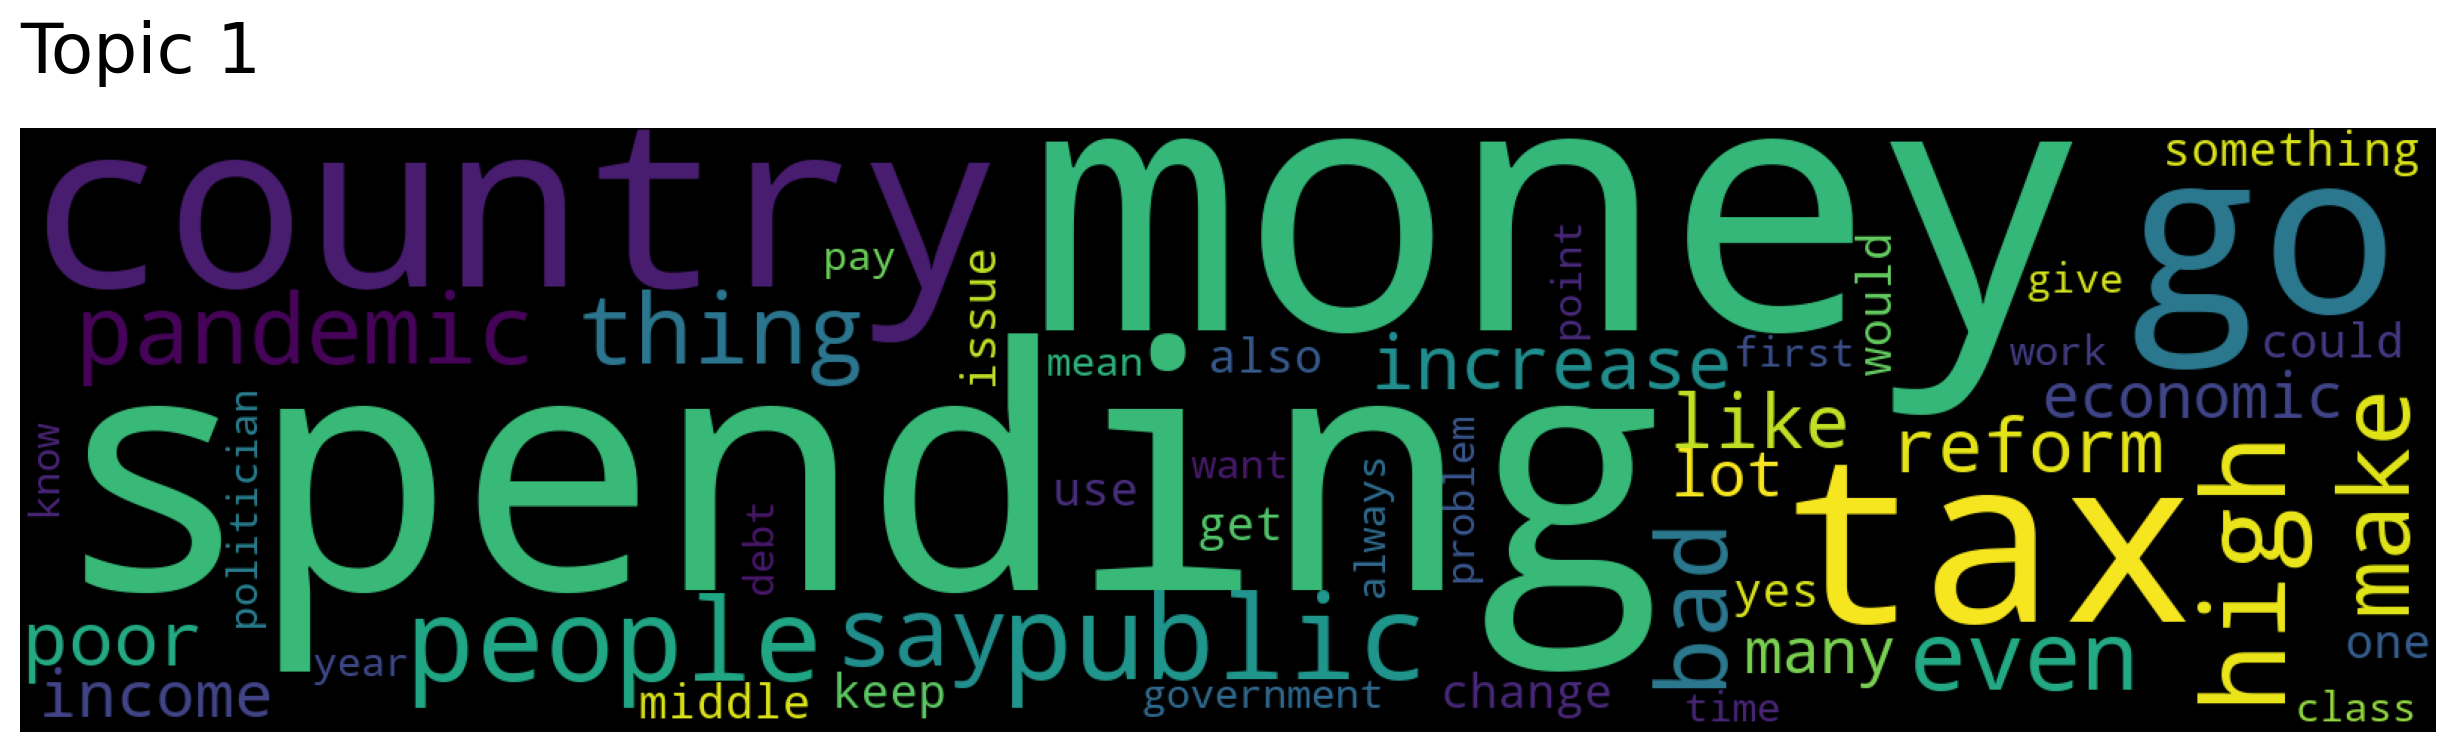

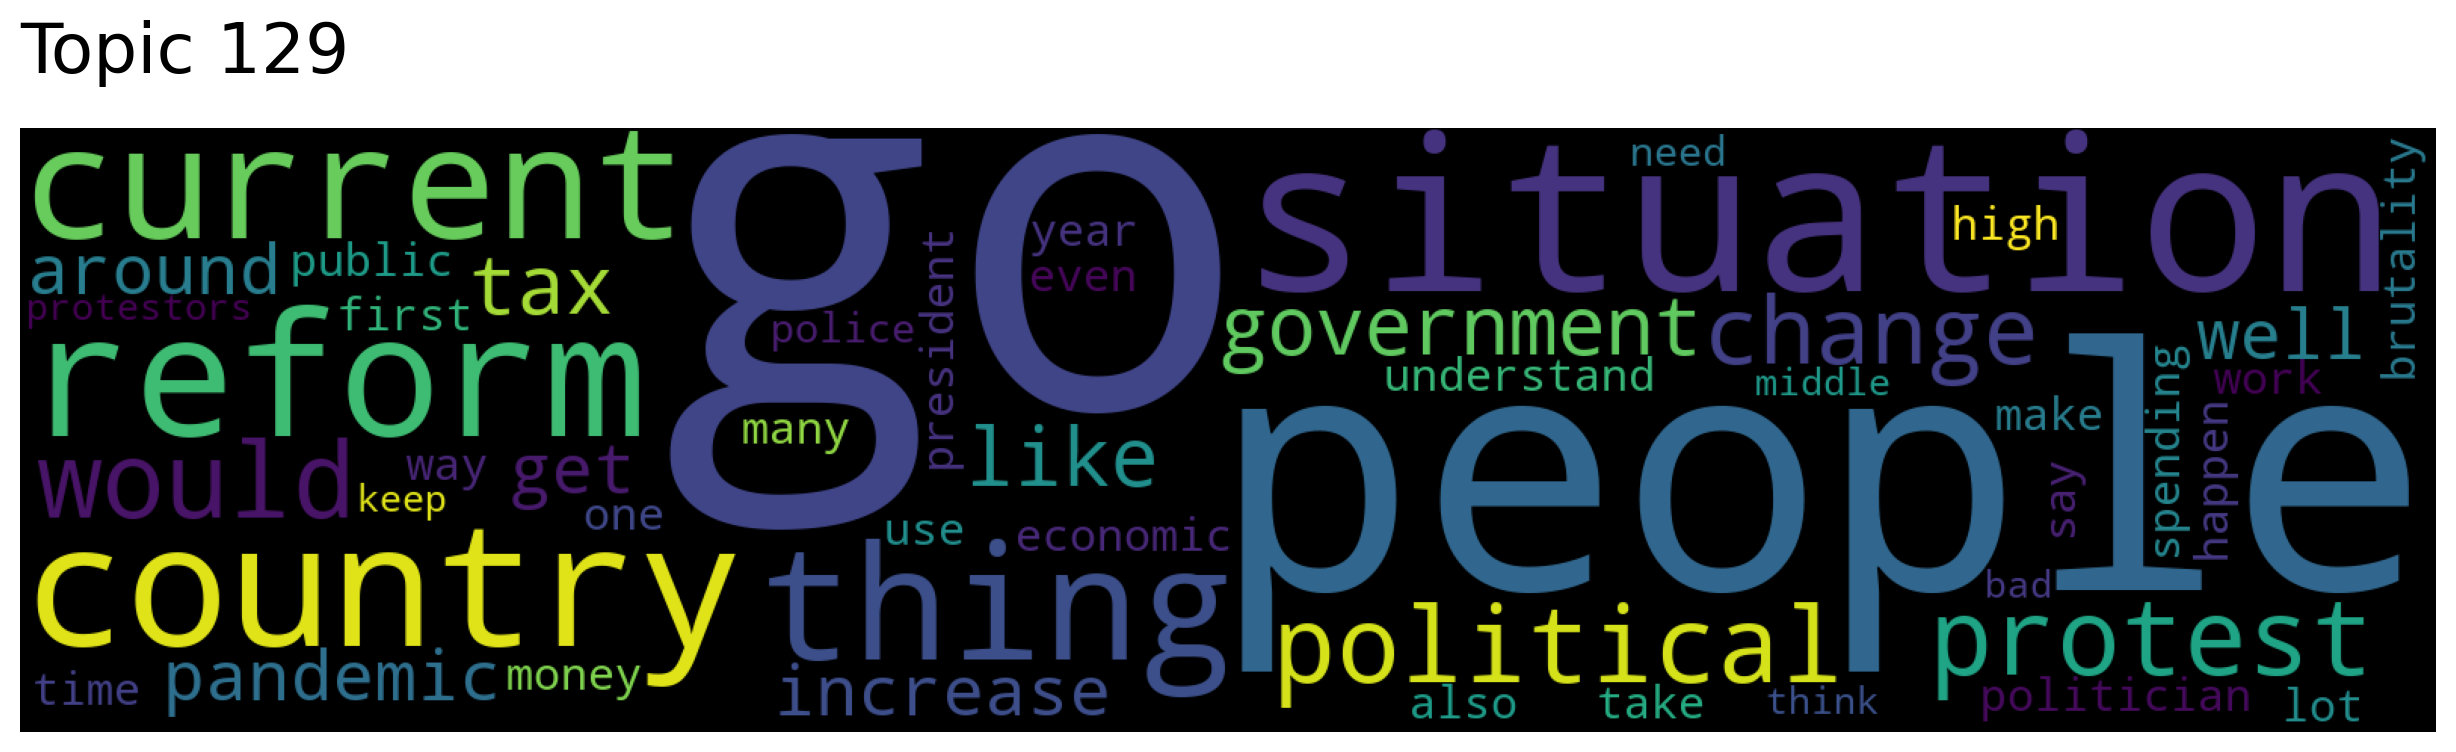

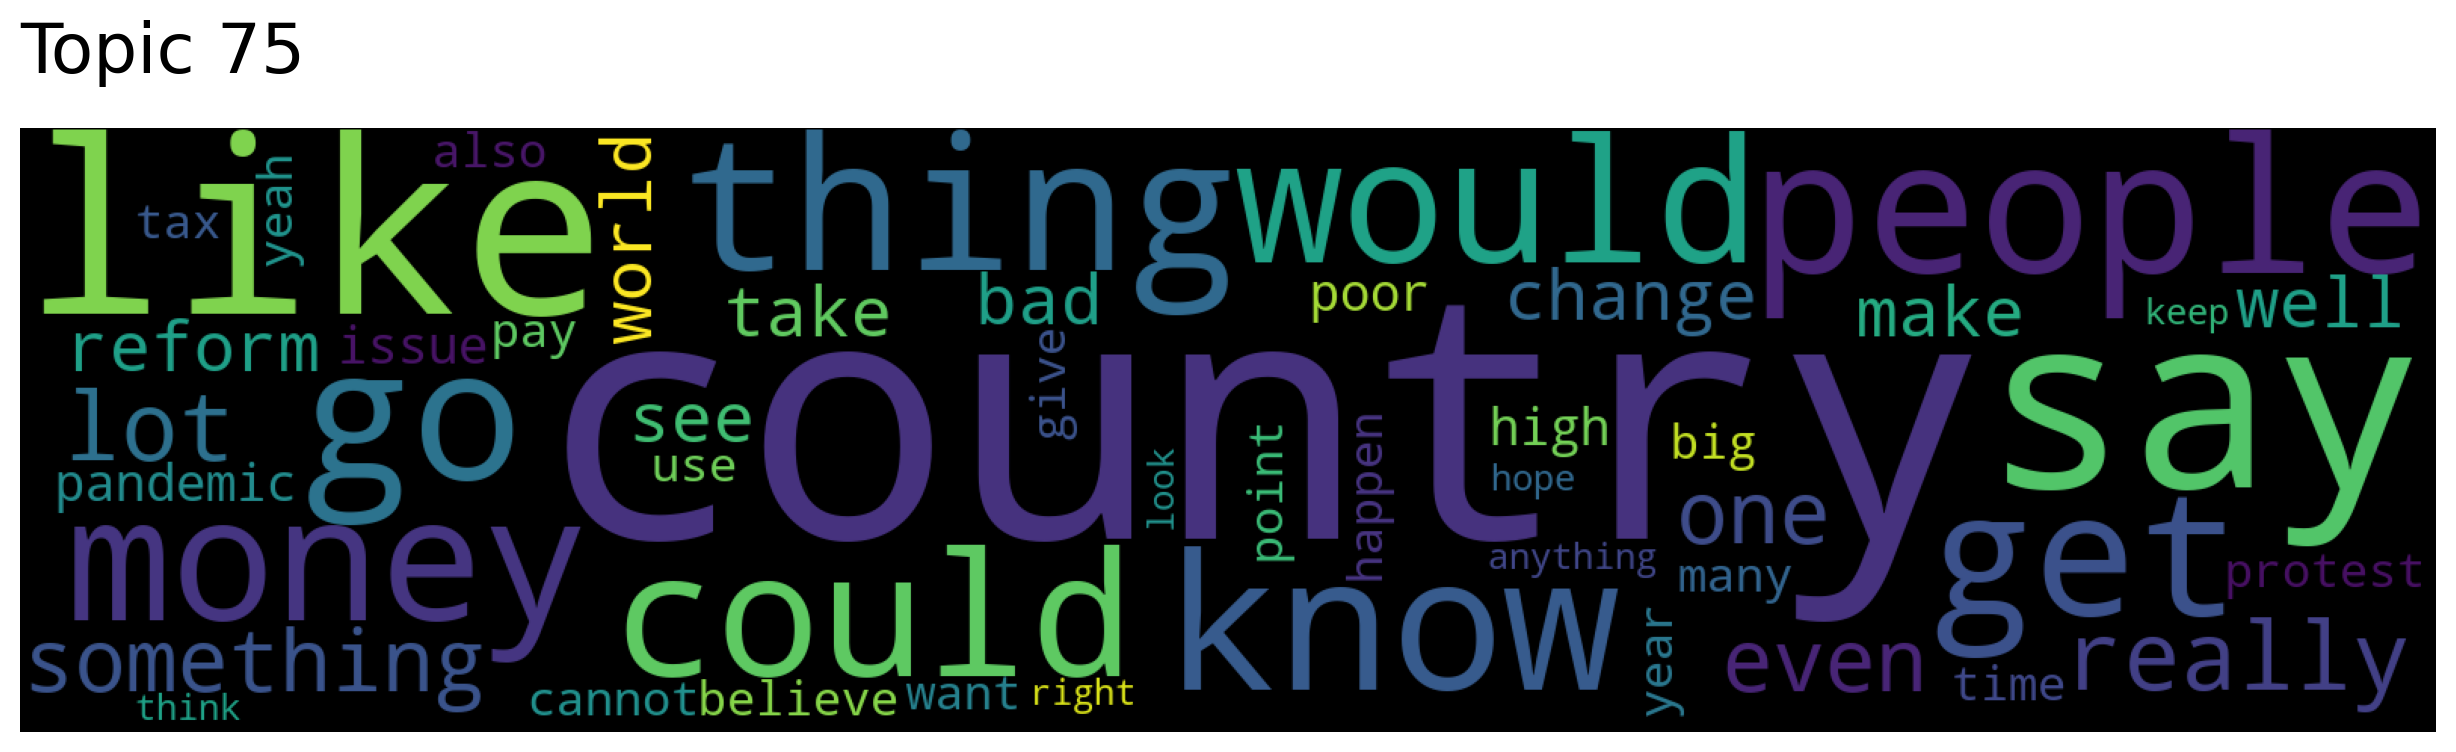

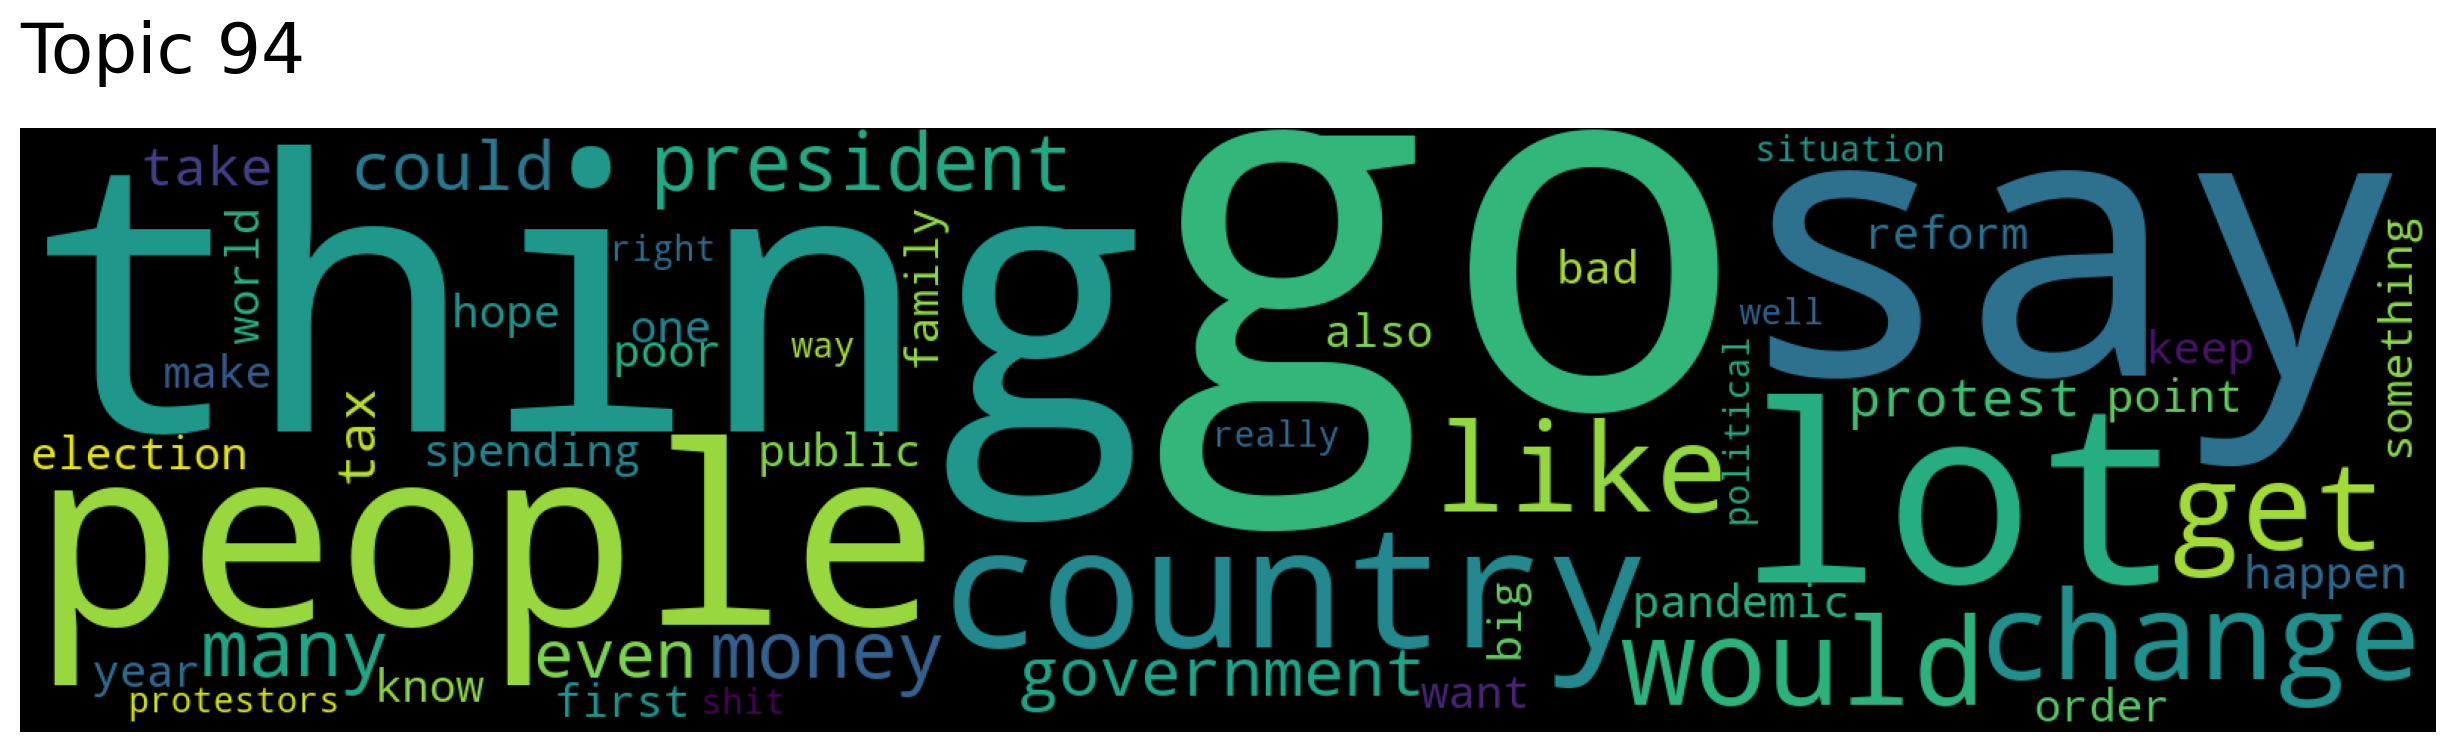

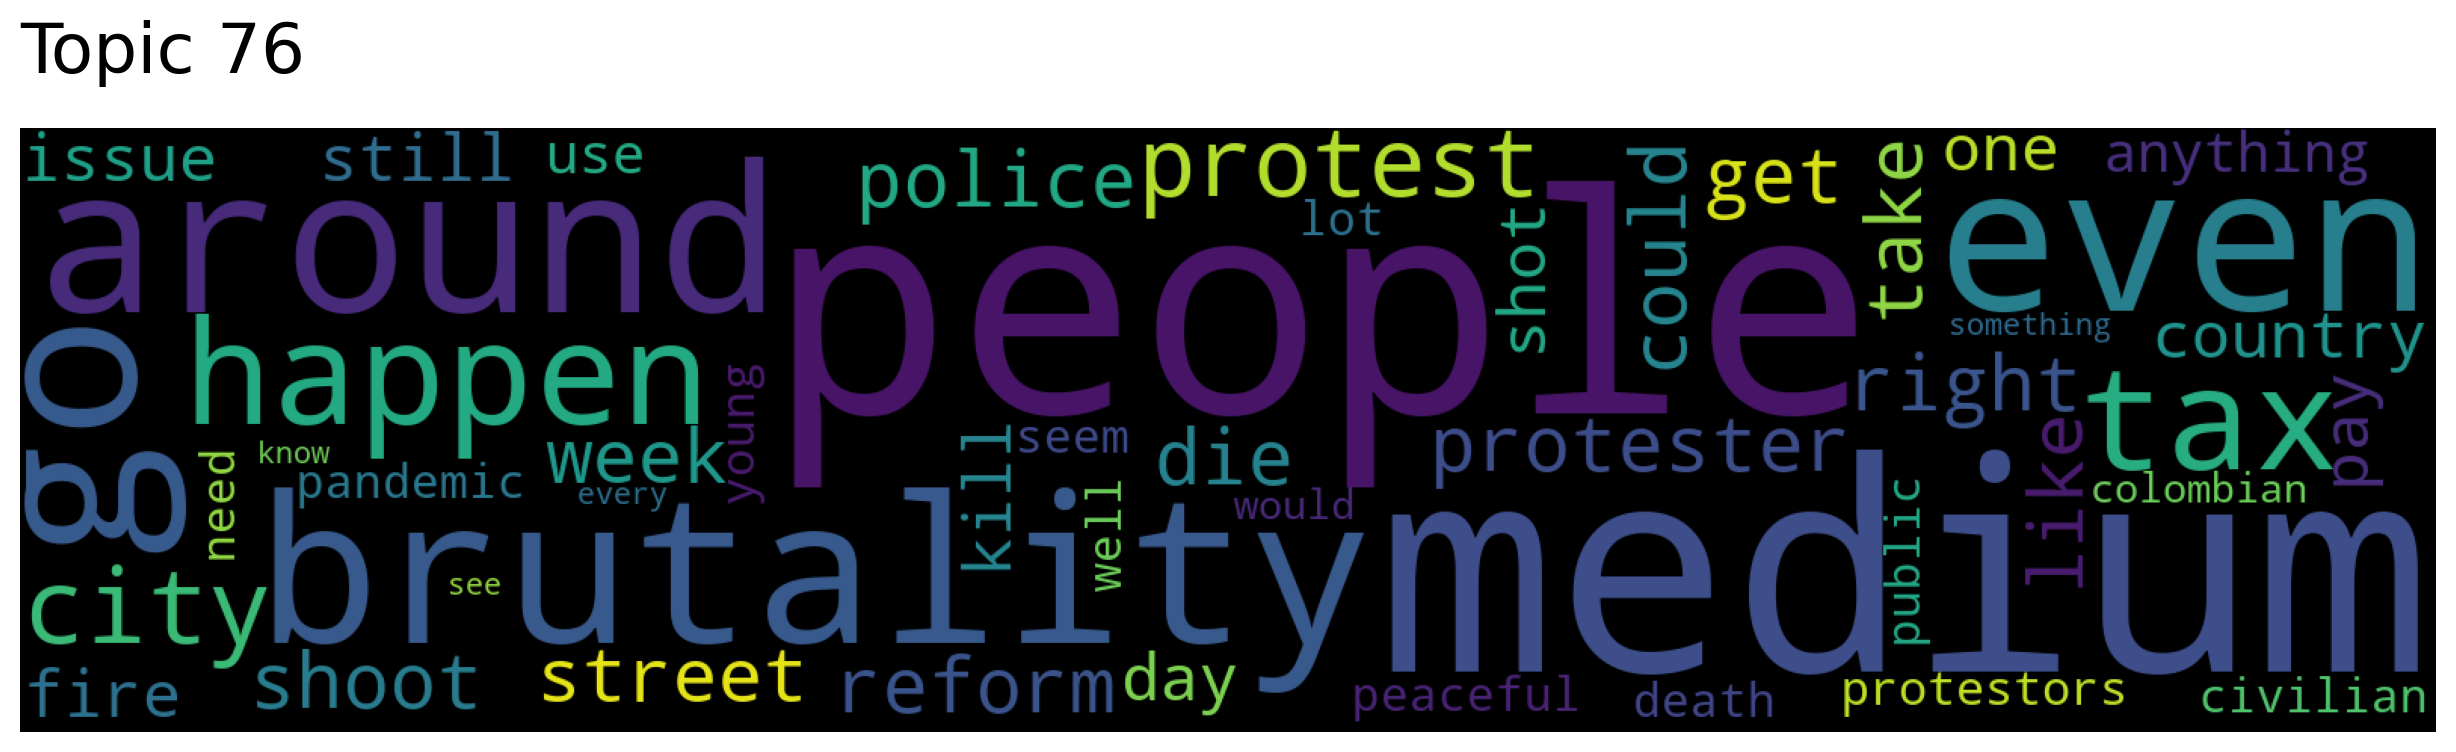

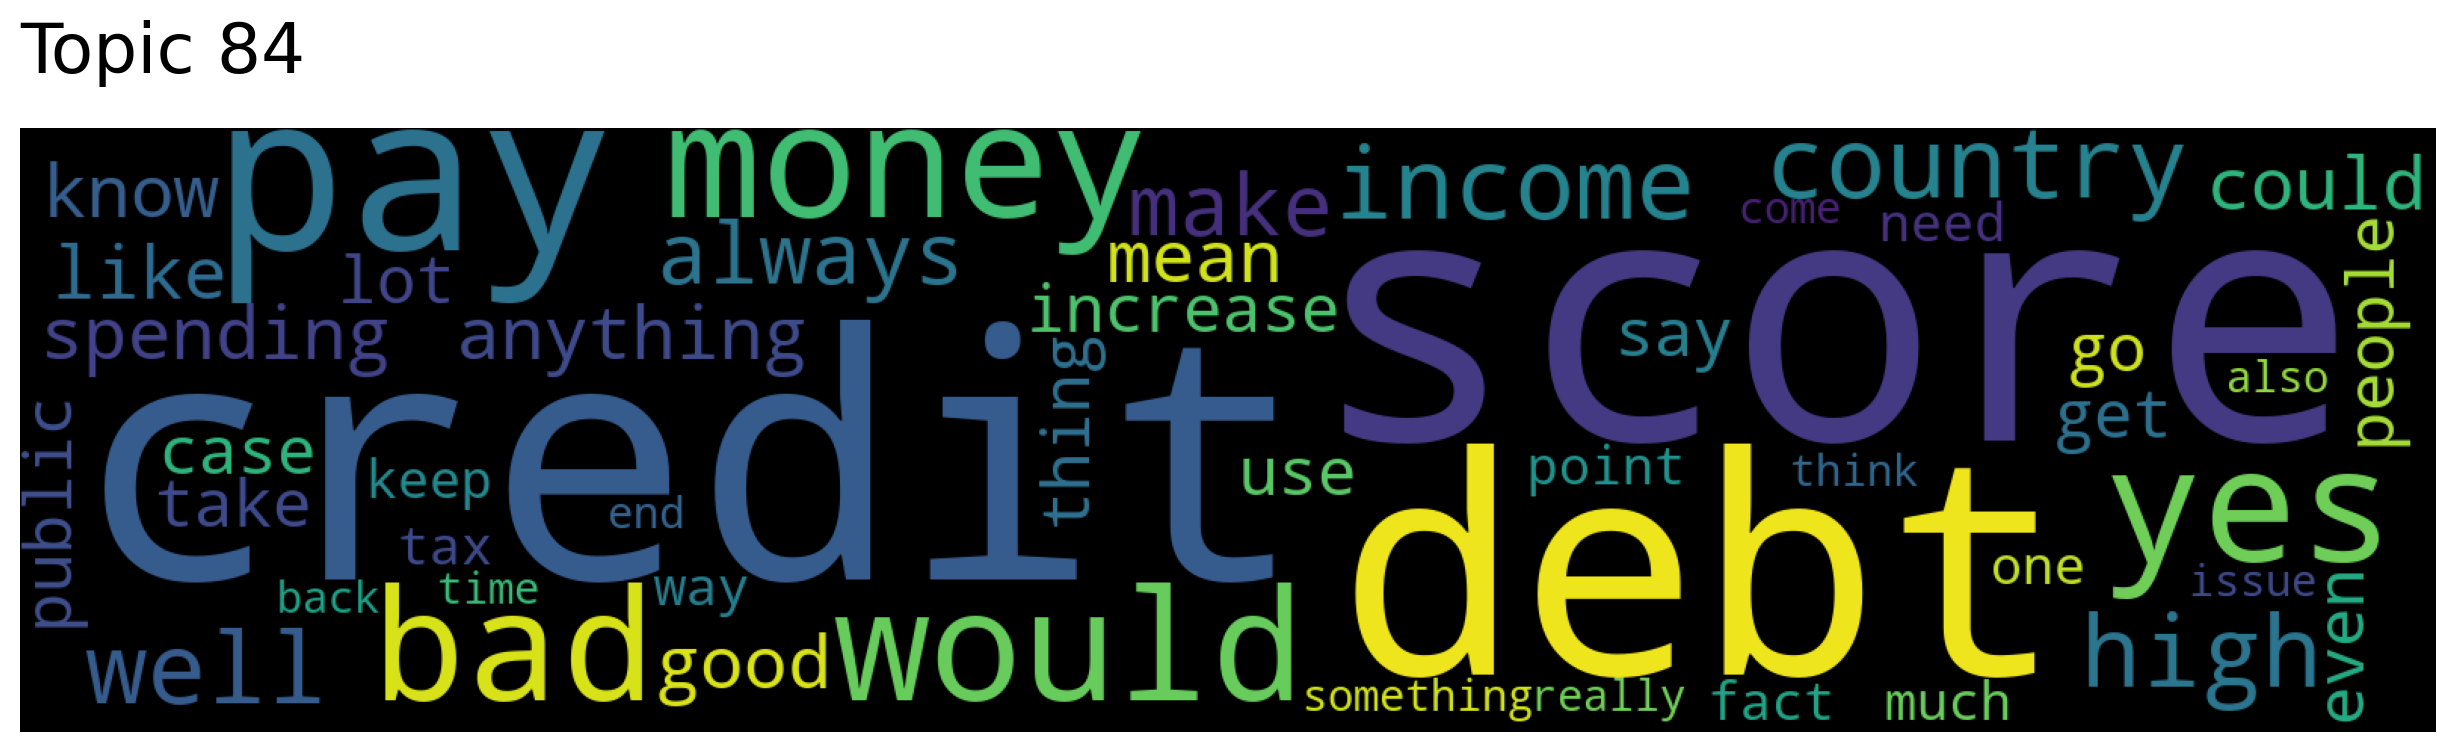

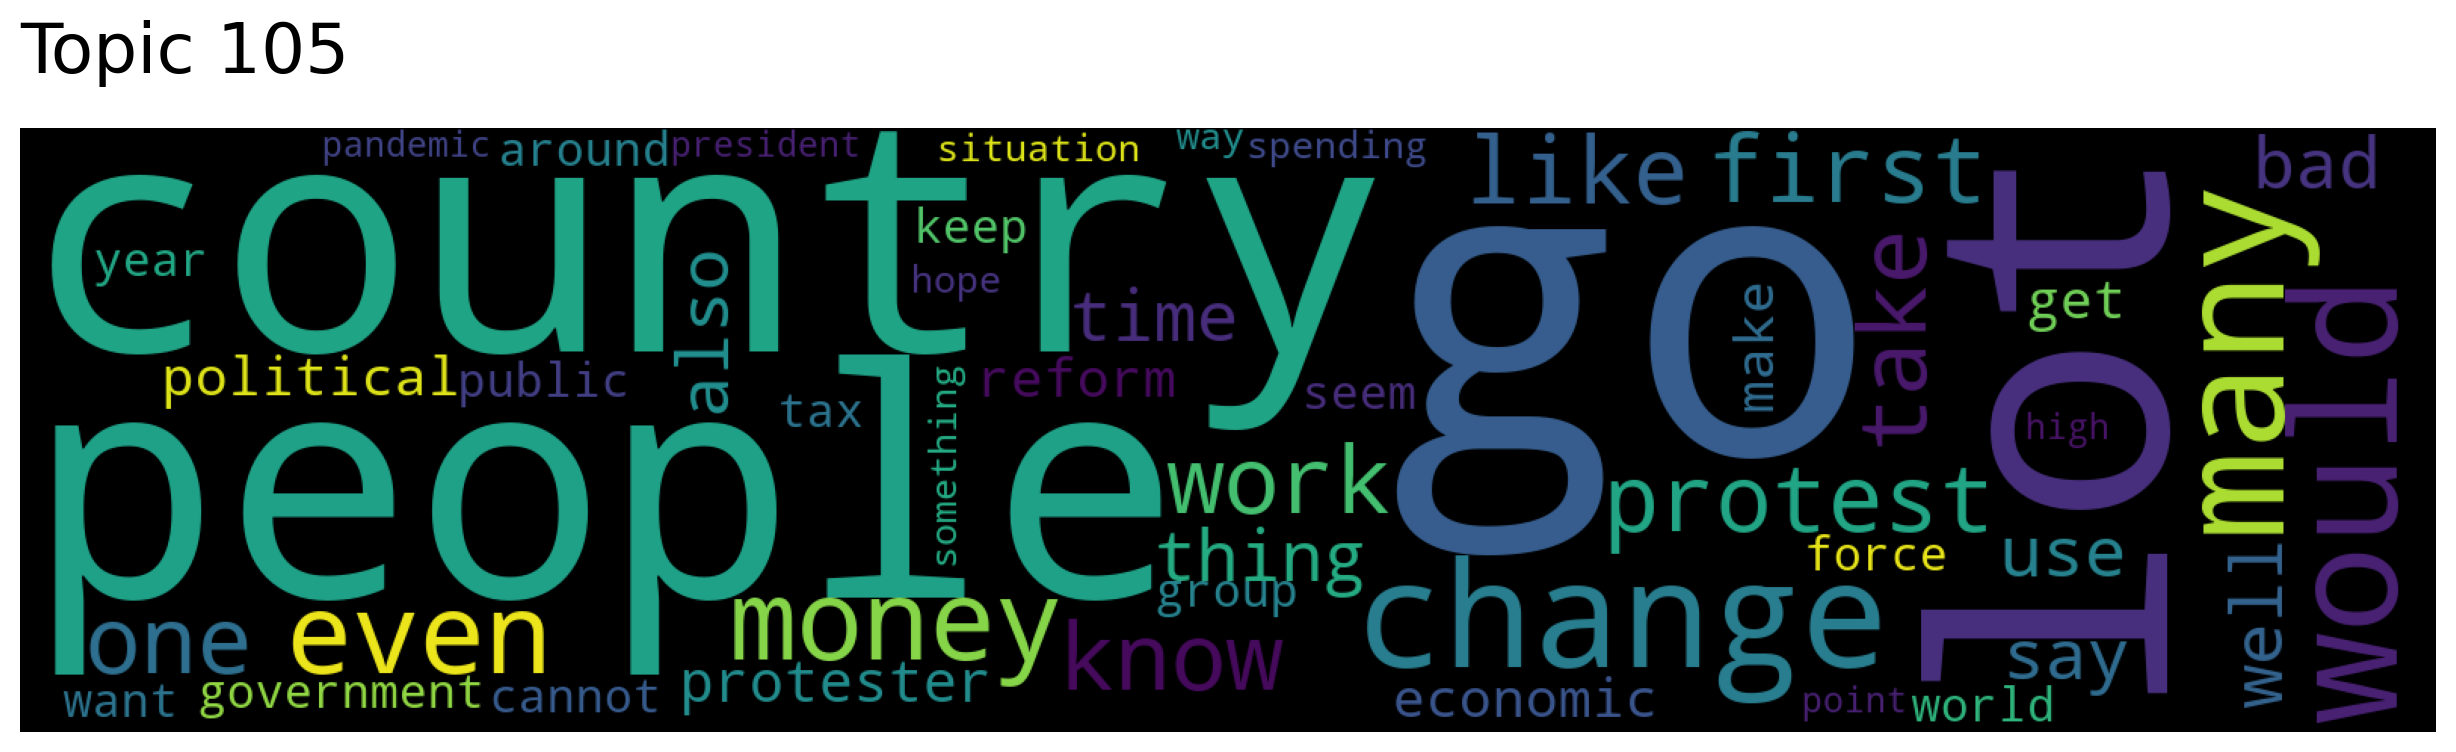

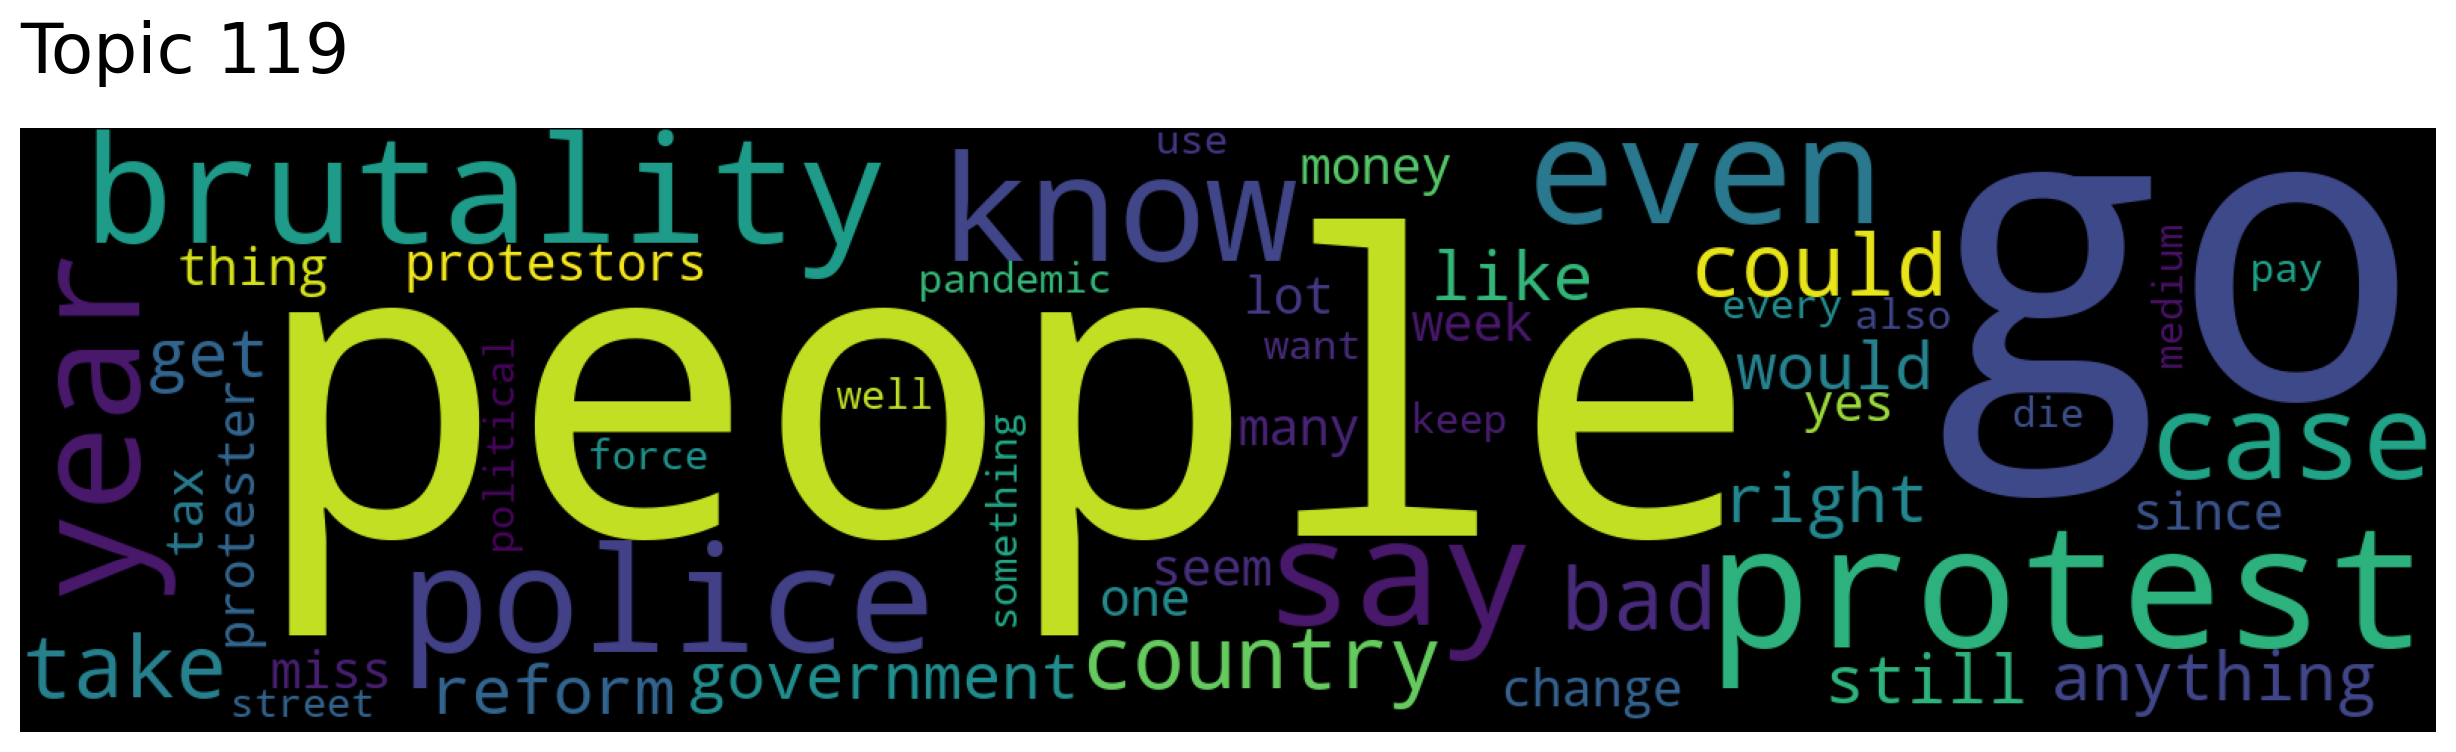

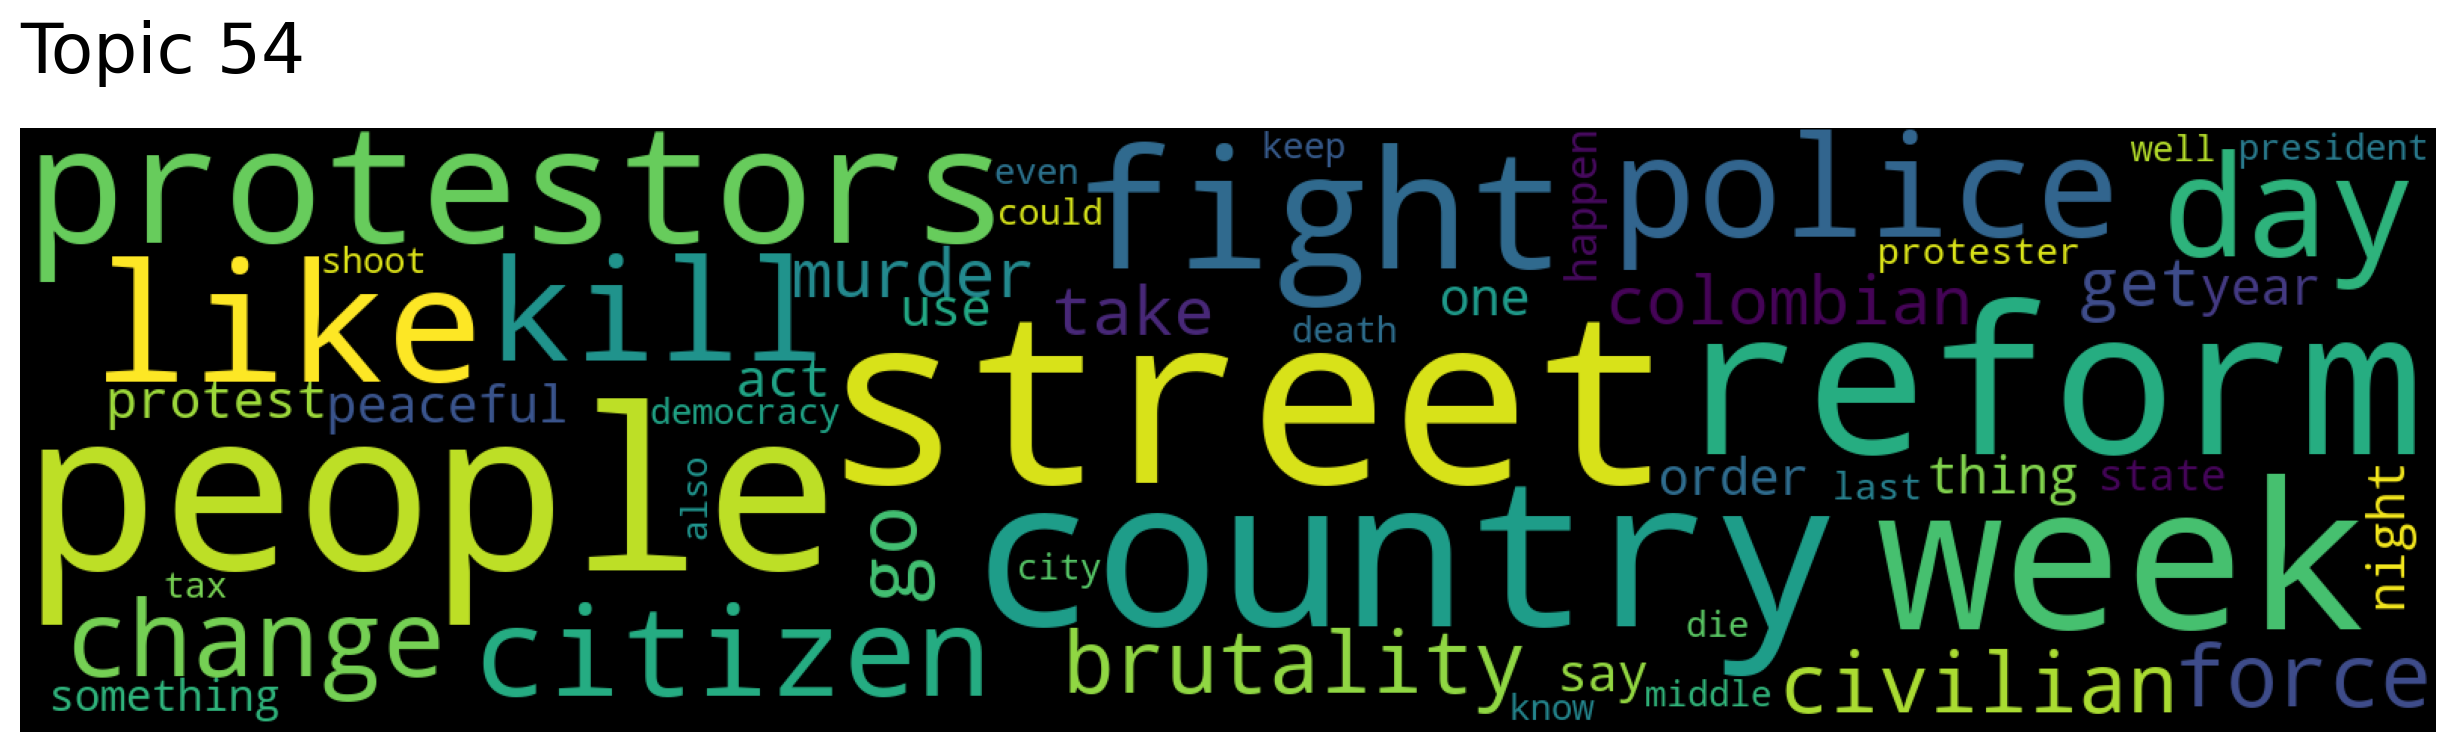

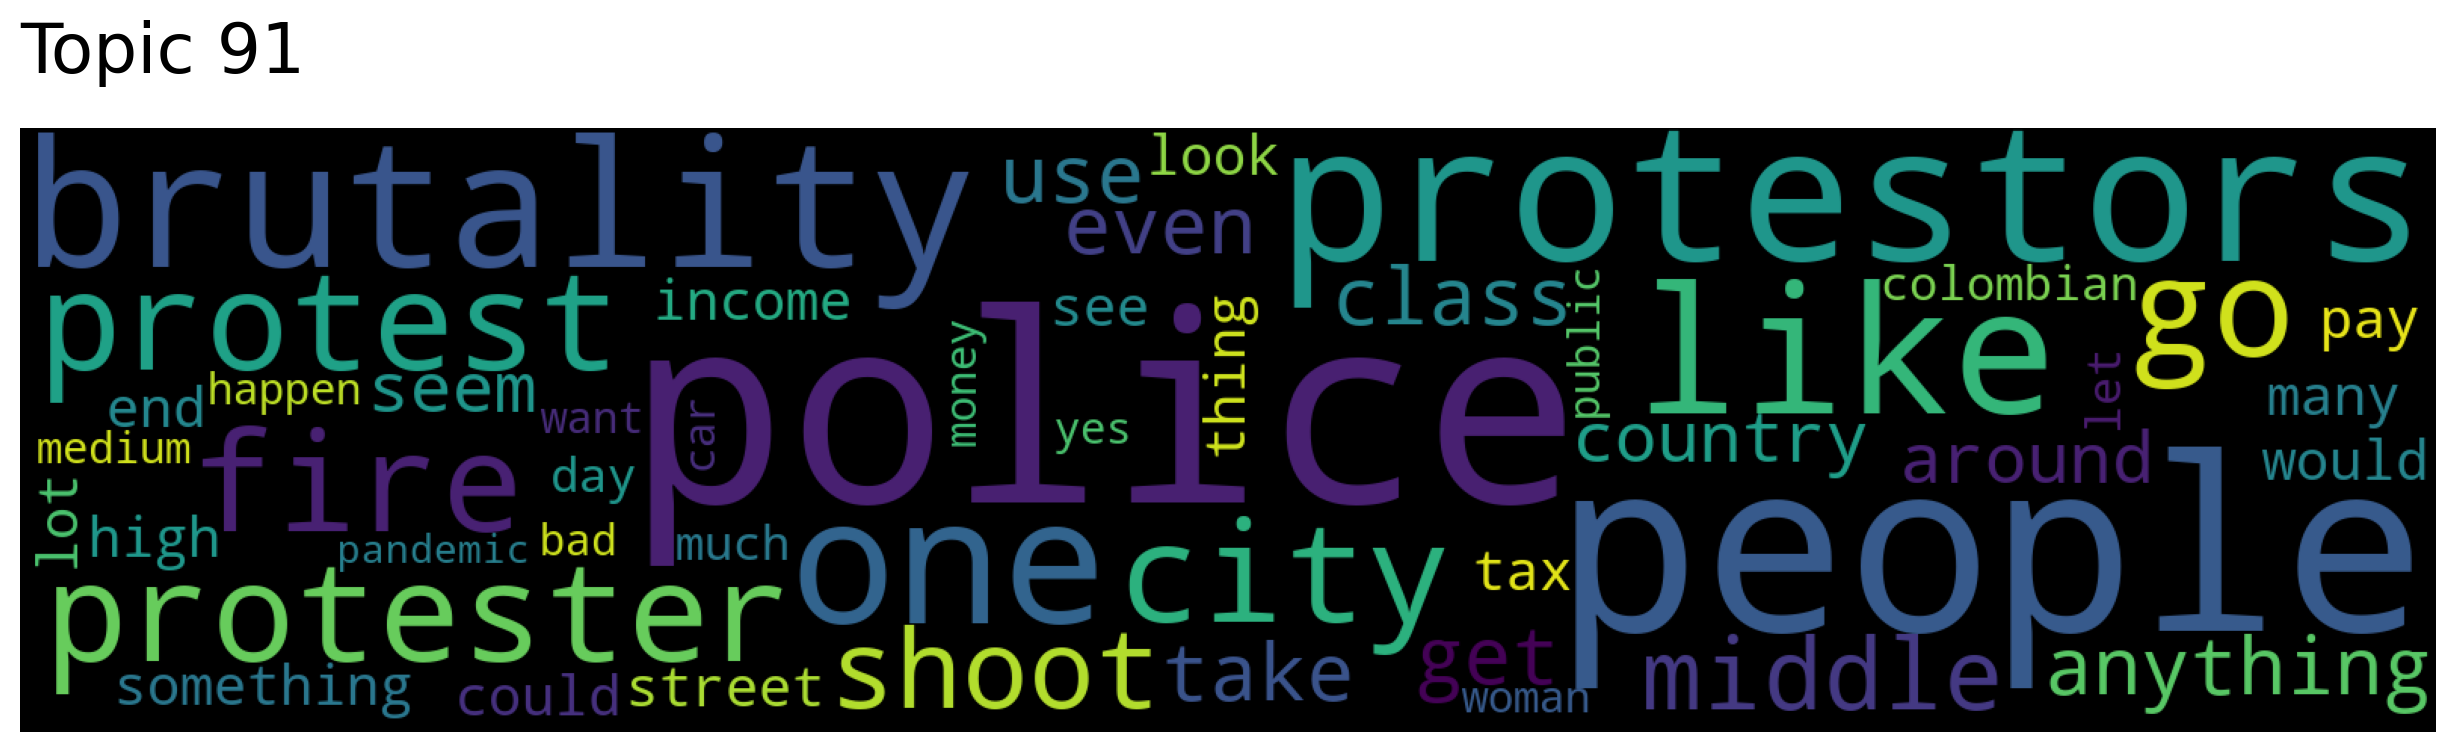

In [15]:
#Discover topics relavant to Colombia - Wordcloud
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["colombia"],num_topics=10)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color="black")